In [1]:
%load_ext autoreload
%autoreload 2


In [1]:
from gammapy.data import DataStore
from astropy.coordinates import SkyCoord
from astropy.time import Time
from agn_pipe.query import  get_exclusion_regions, query_datastore

In [2]:
c = SkyCoord.from_name("1ES 2344+514")
fname = "/raid/RAID1/VERITAS_Data/gammapy/dl3_fullenclosure_moderate2tel_runwise/"
ra = c.ra.deg
dec = c.dec.deg
search_cone = 2.0
tstart = Time("2007-01-01T00:00:00")
tstop = Time("2020-03-01T00:00:00")


In [3]:
data_store = DataStore.from_dir(fname)

In [10]:
data_store.obs_table[data_store.obs_table["OBJECT"] == "1ES2344+514"]

OBS_ID,RA_PNT,DEC_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,N_TELS,TELLIST,OBJECT,RA_OBJ,DEC_OBJ,DATE-OBS,DATE-AVG,DATE-END,NSBLEVEL
,deg,deg,deg,deg,deg,s,s,,s,s,,,,deg,deg,,,,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes20,bytes20,float32,float32,bytes20,bytes20,bytes20,float32
91540,-3.2298782,52.20503,24.988644,65.01136,331.01257,1621.0,1497.6868,0.92392766,437453100.0,437454900.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2018-12-13T02:44:56.,2018-12-13T02:59:56.,2018-12-13T03:14:56.,7.8200083
100366,-4.0368075,51.70236,20.094006,69.906,0.4251815,1801.0,1555.5691,0.86372524,529040670.0,529042460.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2021-11-07T03:44:33.,2021-11-07T03:59:33.,2021-11-07T04:14:34.,7.309654
58115,-3.2300913,51.20503,22.494516,67.505486,334.63992,902.0,849.22754,0.9414939,212047090.0,212048290.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2011-10-22T05:58:00.,2011-10-22T06:08:01.,2011-10-22T06:18:02.,5.902481
43181,-2.4232147,51.70223,20.249977,69.75002,354.4558,69.0,62.691395,0.90857095,120108056.0,120108120.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2008-11-22T03:20:53.,2008-11-22T03:21:27.,2008-11-22T03:22:01.,4.980234
64192,-3.230098,51.20503,21.027796,68.972206,341.0751,1202.0,1017.38727,0.846412,243237600.0,243238800.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2012-10-17T05:59:58.,2012-10-17T06:09:59.,2012-10-17T06:20:00.,7.8332186
75183,-4.036807,51.70233,20.111921,69.88808,3.3943107,1505.0,1266.917,0.8418053,309063520.0,309065020.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2014-11-18T02:58:34.,2014-11-18T03:11:06.,2014-11-18T03:23:38.,6.59573
94513,-4.0368075,51.70235,22.211025,67.78898,338.29385,1741.0,1533.2745,0.8806861,465454800.0,465456580.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2019-11-02T04:59:44.,2019-11-02T05:14:44.,2019-11-02T05:29:44.,6.27253
64245,-3.230098,51.20503,20.542107,69.45789,344.29395,1202.0,1023.8006,0.8517476,243495540.0,243496740.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2012-10-20T05:38:50.,2012-10-20T05:48:51.,2012-10-20T05:58:52.,6.85608


In [11]:
obs_ids = query_datastore(fname, ra, dec, search_cone)
# obs_ids = query_datastore(fname, ra, dec, search_cone, tstart, tstop)
len(obs_ids)

358

In [12]:
excl = get_exclusion_regions(ra, dec)

In [13]:
from pathlib import Path

# Check package versions
import numpy as np
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion

# %matplotlib inline
import matplotlib.pyplot as plt

In [14]:
from IPython.display import display
from gammapy.data import DataStore
from gammapy.datasets import (
    Datasets,
    FluxPointsDataset,
    SpectrumDataset,
    SpectrumDatasetOnOff,
)
from gammapy.estimators import FluxPointsEstimator
from gammapy.estimators.utils import resample_energy_edges
from gammapy.makers import (
    ReflectedRegionsBackgroundMaker,
    SafeMaskMaker,
    SpectrumDatasetMaker,
)
from gammapy.maps import MapAxis, RegionGeom, WcsGeom
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    ExpCutoffPowerLawSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
    create_crab_spectral_model,
)

In [15]:
datastore = DataStore.from_dir(fname)
# obs_ids = [23523, 23526, 23559, 23592]
observations = datastore.get_observations(obs_ids)

In [16]:
target_position = SkyCoord(ra=ra, dec=dec, unit="deg", frame="icrs")
on_region_radius = Angle("0.089 deg")
on_region = CircleSkyRegion(center=target_position, radius=on_region_radius)

[356.770153, 51.704967, '0.35 deg']
0.35 deg
[355.669665, 51.427703, '0.35 deg']
0.35 deg
[355.771068, 51.939335, '0.35 deg']
0.35 deg
[355.806213, 52.248194, '0.35 deg']
0.35 deg
[356.230205, 50.587403, '0.35 deg']
0.35 deg
[356.517162, 50.66315, '0.35 deg']
0.35 deg
[356.551261, 50.786586, '0.35 deg']
0.35 deg
[356.73458, 51.228996, '0.35 deg']
0.35 deg
[357.59264, 51.621663, '0.35 deg']
0.35 deg
[357.747321, 51.398241, '0.35 deg']
0.35 deg


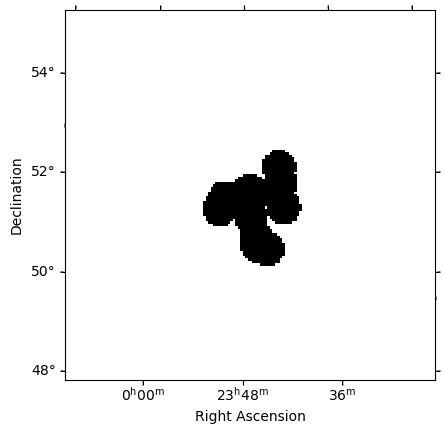

In [17]:
exclusion_region = CircleSkyRegion(
    center=SkyCoord(ra, dec, unit="deg", frame="icrs"),
    radius=0.4 * u.deg,
)

regions = [exclusion_region]
for exc in excl:
    print (exc)
    print (exc[2])
    regions.append(
        CircleSkyRegion(
            center=SkyCoord(exc[0], exc[1], unit="deg", frame="icrs"),
            radius= u.Quantity(exc[2]),
        )
    )
skydir = target_position
geom = WcsGeom.create(
    npix=(150, 150), binsz=0.05, skydir=skydir, proj="TAN", frame="icrs"
)

exclusion_mask = ~geom.region_mask(regions)
exclusion_mask.plot()
plt.show()

In [18]:
energy_axis = MapAxis.from_energy_bounds(
    0.1, 40, nbin=10, per_decade=True, unit="TeV", name="energy"
)
energy_axis_true = MapAxis.from_energy_bounds(
    0.05, 100, nbin=20, per_decade=True, unit="TeV", name="energy_true"
)

geom = RegionGeom.create(region=on_region, axes=[energy_axis])
dataset_empty = SpectrumDataset.create(geom=geom, energy_axis_true=energy_axis_true)

dataset_maker = SpectrumDatasetMaker(
    containment_correction=True, selection=["counts", "exposure", "edisp"]
)
bkg_maker = ReflectedRegionsBackgroundMaker(exclusion_mask=exclusion_mask)
safe_mask_masker = SafeMaskMaker(methods=["aeff-max"], aeff_percent=10)

In [19]:
datasets = Datasets()

for obs_id, observation in zip(obs_ids, observations):
    dataset = dataset_maker.run(dataset_empty.copy(name=str(obs_id)), observation)
    dataset_on_off = bkg_maker.run(dataset, observation)
    dataset_on_off = safe_mask_masker.run(dataset_on_off, observation)
    datasets.append(dataset_on_off)

# print(datasets)

ReflectedRegionsBackgroundMaker failed. No OFF region found outside exclusion mask for dataset '100366'.
ReflectedRegionsBackgroundMaker failed. Setting 100366 mask to False.
ReflectedRegionsBackgroundMaker failed. No OFF region found outside exclusion mask for dataset '75183'.
ReflectedRegionsBackgroundMaker failed. Setting 75183 mask to False.
ReflectedRegionsBackgroundMaker failed. No OFF region found outside exclusion mask for dataset '94513'.
ReflectedRegionsBackgroundMaker failed. Setting 94513 mask to False.
ReflectedRegionsBackgroundMaker failed. No OFF region found outside exclusion mask for dataset '79854'.
ReflectedRegionsBackgroundMaker failed. Setting 79854 mask to False.
ReflectedRegionsBackgroundMaker failed. No OFF region found outside exclusion mask for dataset '52996'.
ReflectedRegionsBackgroundMaker failed. Setting 52996 mask to False.
ReflectedRegionsBackgroundMaker failed. No OFF region found outside exclusion mask for dataset '104067'.
ReflectedRegionsBackgroundMa

/home/obriens/mambaforge/envs/agn_pipe/lib/python3.11/site-packages/regions/shapes/circle.py:161: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)


AttributeError: 'NoneType' object has no attribute 'plot_region'

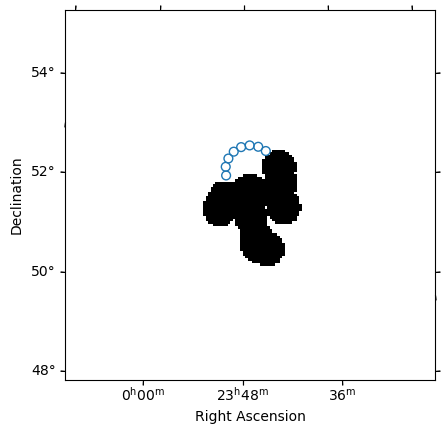

In [21]:
from gammapy.visualization import plot_spectrum_datasets_off_regions
plt.figure()
ax = exclusion_mask.plot()
on_region.to_pixel(ax.wcs).plot(ax=ax, edgecolor="k")
plot_spectrum_datasets_off_regions(ax=ax, datasets=datasets)
plt.show()

In [22]:
info_table = datasets.info_table(cumulative=True)

display(info_table)

name,counts,excess,sqrt_ts,background,npred,npred_background,npred_signal,exposure_min,exposure_max,livetime,ontime,counts_rate,background_rate,excess_rate,n_bins,n_fit_bins,stat_type,stat_sum,counts_off,acceptance,acceptance_off,alpha
,,,,,,,,m2 s,m2 s,s,s,1 / s,1 / s,1 / s,,,,,,,,
str7,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str5,float64,int64,float64,float64,float64
stacked,5,1.875,0.9097939460136433,3.125,3.3333333333333335,3.3333333333333335,nan,7986.884765625,218153888.0,1497.6867870722292,1621.0000000000007,0.003338481746089454,0.002086551091305909,0.0012519306547835451,27,22,wstat,6.785192139266471,25,22.0,176.0,0.125
stacked,5,1.875,0.9097939460136433,3.125,3.3333333333333335,3.3333333333333335,nan,7986.884765625,218153888.0,1497.6867870722292,3422.000000000001,0.003338481746089454,0.002086551091305909,0.0012519306547835451,27,22,wstat,6.785192139266471,25,22.0,176.0,0.125
stacked,6,1.875,0.7972275632241681,4.125,4.34188030413759,4.34188030413759,nan,15691.5146484375,348167392.0,2346.9143202397768,4324.0000000000055,0.0025565483785479647,0.0017576270102517258,0.000798921368296239,27,22,wstat,9.073431371503405,27,22.0,144.0,0.1527777761220932
stacked,6,1.875,0.7972275632241681,4.125,4.34188030413759,4.34188030413759,nan,15960.49609375,355431680.0,2409.6057144031033,4393.000000000007,0.0024900339354840435,0.0017118983306452801,0.0007781356048387636,27,22,wstat,9.073431371503405,27,22.0,144.0,0.1527777761220932
stacked,10,3.875,1.289591428478154,6.125,6.747034370780513,6.747034370780513,nan,209734.203125,502801120.0,3426.9929651936072,5595.000000000006,0.00291801007517827,0.0017872811710466904,0.0011307289041315796,27,23,wstat,12.81550616560391,31,23.0,116.40815734863281,0.19758065044879913
stacked,10,3.875,1.289591428478154,6.125,6.747034370780513,6.747034370780513,nan,209734.203125,502801120.0,3426.9929651936072,7100.00000000001,0.00291801007517827,0.0017872811710466904,0.0011307289041315796,27,23,wstat,12.81550616560391,31,23.0,116.40815734863281,0.19758065044879913
stacked,10,3.875,1.289591428478154,6.125,6.747034370780513,6.747034370780513,nan,209734.203125,502801120.0,3426.9929651936072,8841.000000000011,0.00291801007517827,0.0017872811710466904,0.0011307289041315796,27,23,wstat,12.81550616560391,31,23.0,116.40815734863281,0.19758065044879913
stacked,15,7.375,2.0767377769813233,7.625,9.122499421027396,9.122499421027396,nan,478714.4375,650419072.0,4450.793553078382,10043.00000000001,0.0033701855233490403,0.0017131776410357622,0.001657007882313278,27,23,wstat,13.566157413008895,34,23.0,102.557373046875,0.2242647111415863


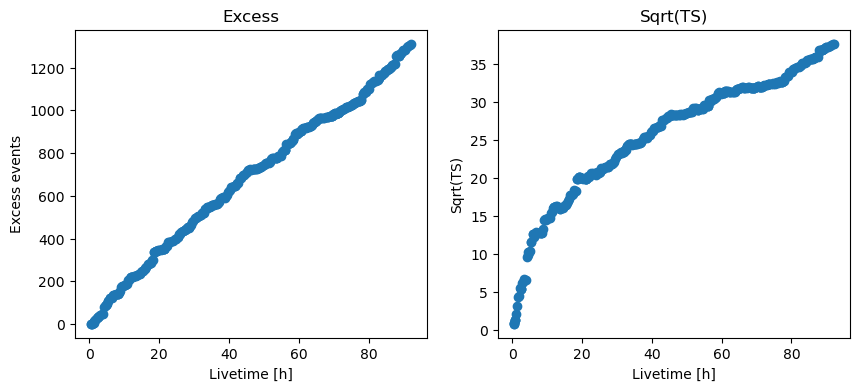

In [24]:
fig, (ax_excess, ax_sqrt_ts) = plt.subplots(figsize=(10, 4), ncols=2, nrows=1)
ax_excess.plot(
    info_table["livetime"].to("h"),
    info_table["excess"],
    marker="o",
    ls="none",
)

ax_excess.set_title("Excess")
ax_excess.set_xlabel("Livetime [h]")
ax_excess.set_ylabel("Excess events")

ax_sqrt_ts.plot(
    info_table["livetime"].to("h"),
    info_table["sqrt_ts"],
    marker="o",
    ls="none",
)

ax_sqrt_ts.set_title("Sqrt(TS)")
ax_sqrt_ts.set_xlabel("Livetime [h]")
ax_sqrt_ts.set_ylabel("Sqrt(TS)")
plt.show()

In [25]:
dataset_stacked = Datasets(datasets).stack_reduce()

In [26]:
spectral_model = PowerLawSpectralModel(
    amplitude=1e-12 * u.Unit("cm-2 s-1 TeV-1"),
    index=2,
    reference=1 * u.TeV,
)
model = SkyModel(spectral_model=spectral_model, name="OJ 287")

dataset_stacked.models = [model]

fit = Fit()
result = fit.run(datasets=dataset_stacked)

# we make a copy here to compare it later
model_best = model.copy()

In [27]:
model_best

SkyModel(spatial_model=None, spectral_model=<gammapy.modeling.models.spectral.PowerLawSpectralModel object at 0x7990e6bdc690>)temporal_model=None)

In [28]:
display(model_best.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link,prior
str1,str9,float64,str14,float64,float64,float64,bool,bool,str1,str1
,index,2.5999e+00,,4.090e-02,nan,nan,False,False,,
,amplitude,1.6497e-12,TeV-1 s-1 cm-2,5.784e-14,nan,nan,False,True,,
,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,,


In [29]:
e_min, e_max = 0.1, 10
energy_edges = np.geomspace(e_min, e_max, 10) * u.TeV

fpe = FluxPointsEstimator(
    energy_edges=energy_edges, source="OJ 287", selection_optional="all"
)
flux_points = fpe.run(datasets=dataset_stacked)

In [30]:
display(flux_points.to_table(sed_type="dnde", formatted=True))

e_ref,e_min,e_max,dnde,dnde_err,dnde_errp,dnde_errn,dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,bool,float64[1],bool,float64[11],float64[11]
0.125,0.100,0.156,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.217,0.156,0.303,6.286e-11,1.244e-11,1.282e-11,1.208e-11,8.928e-11,35.886,5.990,96.33858336475163,51.25506,2.184,38.070,False,95.0,True,0.200 .. 5.000,19.115 .. 333.623
0.379,0.303,0.473,1.823e-11,1.394e-12,1.412e-12,1.377e-12,2.109e-11,251.020,15.844,553.3058567044816,318.9599,1.262,252.281,False,553.0,True,0.200 .. 5.000,137.871 .. 1506.035
0.590,0.473,0.737,6.945e-12,4.546e-13,4.608e-13,4.485e-13,7.879e-12,391.053,19.775,516.4088977385803,356.5621,1.744,392.797,False,517.0,True,0.200 .. 5.000,232.762 .. 1305.778
1.028,0.737,1.434,1.797e-12,1.085e-13,1.100e-13,1.069e-13,2.020e-12,525.022,22.913,470.8794956256943,366.13297,3.575,528.597,False,471.0,True,0.200 .. 5.000,318.922 .. 1200.695
1.790,1.434,2.235,3.397e-13,3.853e-14,3.956e-14,3.752e-14,4.209e-13,142.975,11.957,137.03747539450728,105.43388,0.016,142.991,False,137.0,True,0.200 .. 5.000,75.980 .. 510.464
2.790,2.235,3.483,1.185e-13,1.606e-14,1.666e-14,1.549e-14,1.531e-13,118.485,10.885,76.92080690551586,65.54981,0.265,118.750,False,77.0,True,0.200 .. 5.000,64.198 .. 278.255
4.348,3.483,5.429,3.432e-14,6.677e-15,7.034e-15,6.330e-15,4.912e-14,58.513,7.649,37.08342813985531,31.64359,0.136,58.650,False,37.0,True,0.200 .. 5.000,29.645 .. 155.762


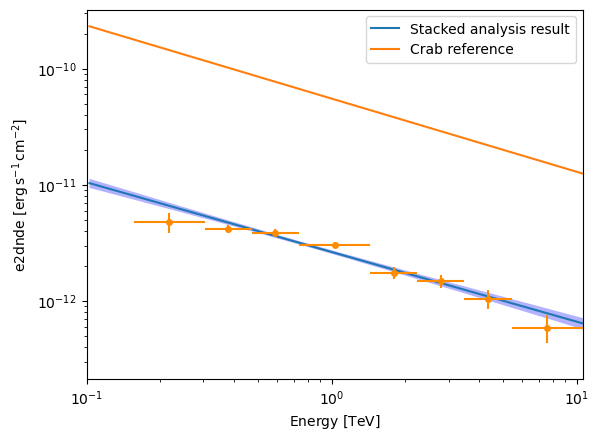

In [31]:
fig, ax = plt.subplots()

plot_kwargs = {
    "energy_bounds": [0.1, 30] * u.TeV,
    "sed_type": "e2dnde",
    "yunits": u.Unit("erg cm-2 s-1"),
    "ax": ax,
}

# plot stacked model
model_best.spectral_model.plot(**plot_kwargs, label="Stacked analysis result")
model_best.spectral_model.plot_error(facecolor="blue", alpha=0.3, **plot_kwargs)

crab = create_crab_spectral_model("hess_pl")
crab.plot(
    **plot_kwargs,
    label="Crab reference",
)

flux_points.plot(ax=ax, sed_type="e2dnde", color="darkorange")
# flux_points.plot_ts_profiles(ax=ax, sed_type="e2dnde")
ax.legend()
plt.show()

# sphinx_gallery_thumbnail_number = 5

In [32]:
# group results to an output file
flux_point_table = flux_points.to_table(sed_type="dnde", formatted=True)
model = model_best.to_dict()

In [33]:
model

{'name': 'QSHbmAFU',
 'type': 'SkyModel',
 'spectral': {'type': 'PowerLawSpectralModel',
  'parameters': [{'name': 'index',
    'value': 2.59991893746878,
    'error': 0.040904471840105226},
   {'name': 'amplitude',
    'value': 1.6497122601766647e-12,
    'unit': 'TeV-1 s-1 cm-2',
    'error': 5.783612345649908e-14},
   {'name': 'reference', 'value': 1.0, 'unit': 'TeV'}]}}

In [34]:
100 * model_best.spectral_model.integral(0.1 * u.TeV,30 * u.TeV) / crab.integral(0.1 * u.TeV,30 * u.TeV)

<Quantity 4.54558953>

In [35]:
from gammapy.estimators import LightCurveEstimator
import math

In [37]:
print (tstart, tstop.mjd)

2007-01-01T00:00:00.000 58909.0


In [38]:
t0 = tstart
duration = 5 * u.day
n_time_bins = math.ceil((tstop - tstart) / duration)
print (n_time_bins)
times = t0 + np.arange(n_time_bins) * duration
print (times)
time_intervals = [Time([_tstart, _tstop]) for _tstart, _tstop in zip(times[:-1], times[1:])]


962
['2007-01-01T00:00:00.000' '2007-01-06T00:00:00.000'
 '2007-01-11T00:00:00.000' '2007-01-16T00:00:00.000'
 '2007-01-21T00:00:00.000' '2007-01-26T00:00:00.000'
 '2007-01-31T00:00:00.000' '2007-02-05T00:00:00.000'
 '2007-02-10T00:00:00.000' '2007-02-15T00:00:00.000'
 '2007-02-20T00:00:00.000' '2007-02-25T00:00:00.000'
 '2007-03-02T00:00:00.000' '2007-03-07T00:00:00.000'
 '2007-03-12T00:00:00.000' '2007-03-17T00:00:00.000'
 '2007-03-22T00:00:00.000' '2007-03-27T00:00:00.000'
 '2007-04-01T00:00:00.000' '2007-04-06T00:00:00.000'
 '2007-04-11T00:00:00.000' '2007-04-16T00:00:00.000'
 '2007-04-21T00:00:00.000' '2007-04-26T00:00:00.000'
 '2007-05-01T00:00:00.000' '2007-05-06T00:00:00.000'
 '2007-05-11T00:00:00.000' '2007-05-16T00:00:00.000'
 '2007-05-21T00:00:00.000' '2007-05-26T00:00:00.000'
 '2007-05-31T00:00:00.000' '2007-06-05T00:00:00.000'
 '2007-06-10T00:00:00.000' '2007-06-15T00:00:00.000'
 '2007-06-20T00:00:00.000' '2007-06-25T00:00:00.000'
 '2007-06-30T00:00:00.000' '2007-07-05T00:

In [39]:


dataset_joint = Datasets(datasets)
dataset_joint.model = model_best.copy()

In [40]:
lc_maker_1d = LightCurveEstimator(time_intervals= time_intervals,
    energy_edges=[0.1, 10] * u.TeV, source="OJ 287", reoptimize=False,
)


In [41]:
lc_1d = lc_maker_1d.run(dataset_joint, )



ValueError: 'OJ 287' is not in list

In [ ]:
print(lc_1d.geom.axes.names)

display(lc_1d.to_table(sed_type="flux", format="lightcurve"))

['energy', 'time']


time_min,time_max,e_ref,e_min,e_max,flux,flux_err,ts,sqrt_ts,npred,npred_excess,stat,stat_null,counts,success
,,TeV,TeV,TeV,1 / (s cm2),1 / (s cm2),,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,54]","float64[1,54]",float64[1],float64[1],"float64[1,54]",bool[1]
57774.00080074074,57779.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,2.3877790942146748e-18,1.0159110035843828e-15,-5.320563879251949e-06,0.0,4.692308779500709 .. nan,1.13352871267125e-06 .. nan,50.02839459965676,50.02838927909288,4.0 .. nan,True
57784.00080074074,57789.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,4.7822753407227656e-18,8.347880303372503e-16,-5.199156333901556e-06,0.0,nan .. nan,nan .. nan,175.67895014820954,175.6789449490532,nan .. nan,True
57799.00080074074,57804.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,4.881108282022374e-12,2.2932646100987925e-12,5.42595273443397,2.32936745371656,nan .. nan,nan .. nan,41.41690389084828,46.84285662528225,nan .. nan,True
57804.00080074074,57809.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,1.3703319870389946e-12,2.043170806582187e-12,0.4688767390639157,0.684745747751613,nan .. nan,nan .. nan,114.12659056916846,114.59546730823237,nan .. nan,True


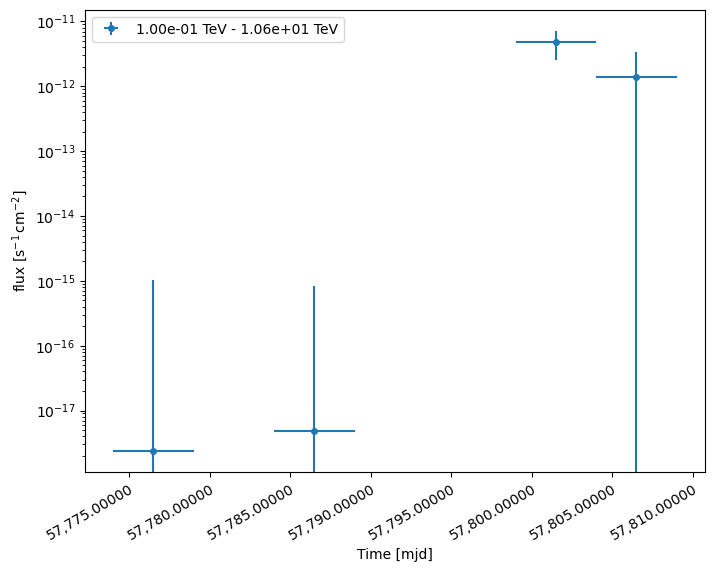

In [ ]:
plt.figure(figsize=(8, 6))
lc_1d.plot(marker="o", sed_type="flux",time_format="mjd")
plt.show()